In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
print("Survival Counts:\n", df['Survived'].value_counts(), "\n")
print("Passenger Class Counts:\n", df['Pclass'].value_counts(), "\n")
print("Sex Counts:\n", df['Sex'].value_counts(), "\n")
print("Embarked Counts:\n", df['Embarked'].value_counts(), "\n")


Survival Counts:
 Survived
0    549
1    342
Name: count, dtype: int64 

Passenger Class Counts:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

Sex Counts:
 Sex
male      577
female    314
Name: count, dtype: int64 

Embarked Counts:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 



In [16]:
df_plot = df.copy()

df_plot['Sex'] = df_plot['Sex'].map({'male': 0, 'female': 1})
df_plot['Embarked'] = df_plot['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


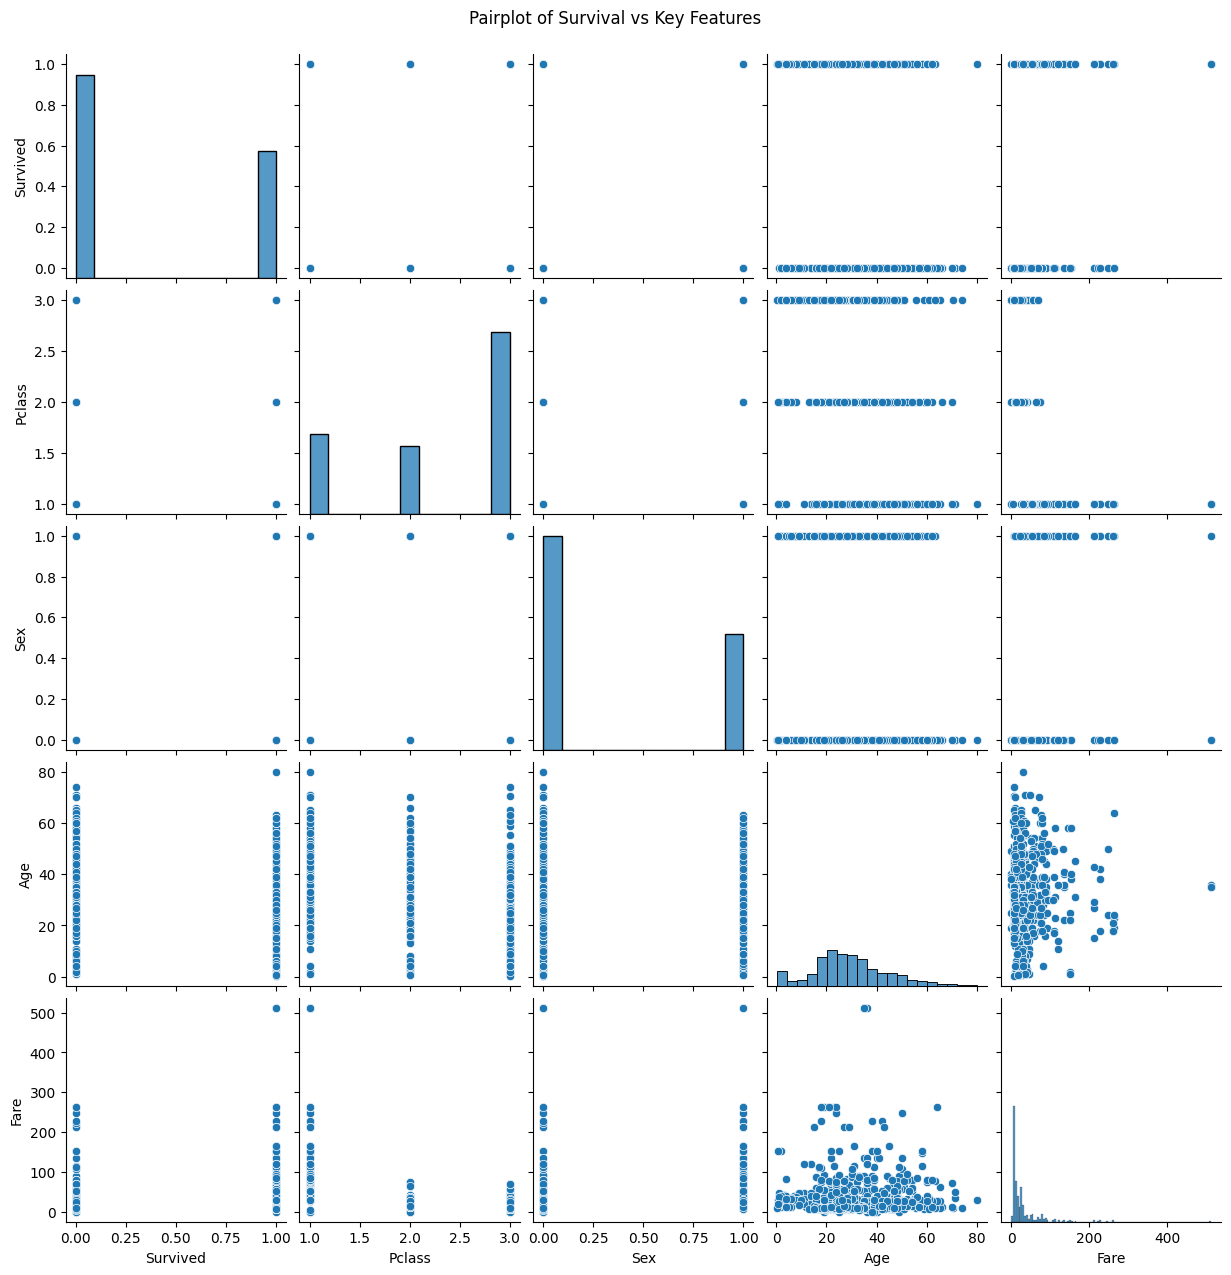

In [17]:
sns.pairplot(df_plot[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']])
plt.suptitle("Pairplot of Survival vs Key Features", y=1.02)
plt.show()


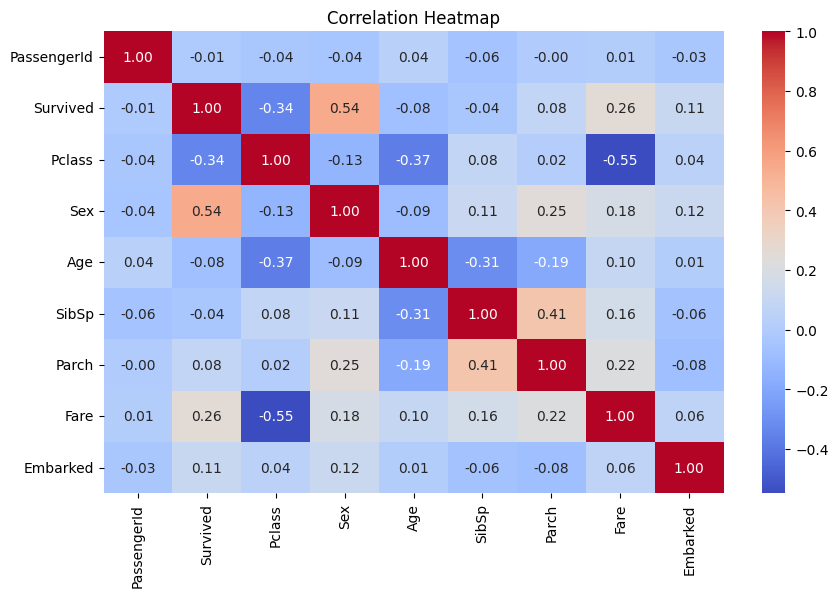

In [18]:
numeric_df = df_plot.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


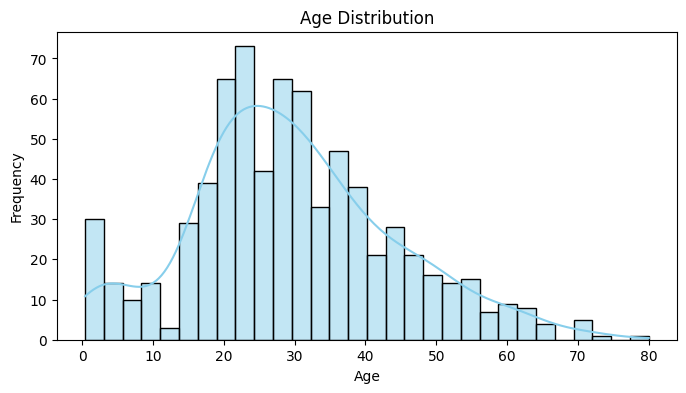

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


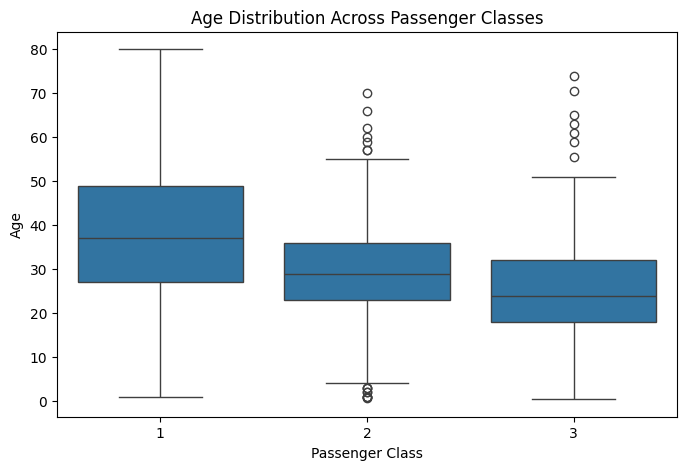

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


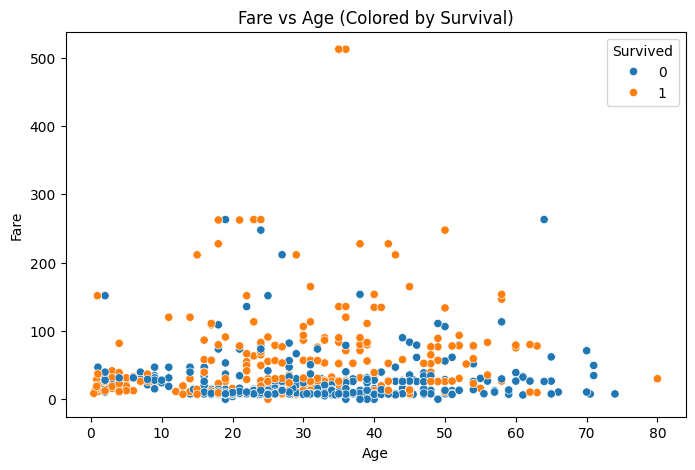

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Age (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()


In [22]:
print("\n🔍 Summary of EDA Findings")
print(f"- Total passengers: {len(df)}")
print(f"- Survival rate: {df['Survived'].mean() * 100:.2f}%")
print("- Women had a much higher survival rate than men.")
print("- 1st class passengers had better survival.")
print("- Age and Fare show meaningful spread and trends.")
print("- 'Cabin' column dropped due to many missing values.")


🔍 Summary of EDA Findings
- Total passengers: 891
- Survival rate: 38.38%
- Women had a much higher survival rate than men.
- 1st class passengers had better survival.
- Age and Fare show meaningful spread and trends.
- 'Cabin' column dropped due to many missing values.
